In [520]:


from IDT_.idt_algo import IDT
from IDT_.ihmm_algo.ihmm import IHMM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 



In [521]:
testperson = 20

In [522]:
warnings.filterwarnings('ignore') 
gaze = pd.read_csv("../eye_tracking_expiriment/data/gaze_data_Muhammad_20.csv")
gaze.head(10)

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,left_pupil_diameter,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label
0,0.279564,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
1,0.289748,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
2,0.300728,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
3,0.311782,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
4,0.323778,0,1,NaN,NaN,NaN,15.651641,65.015533,659.987915,NaN,...,NaN,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
5,0.335737,1,1,-49.291977,66.018852,658.420227,15.651641,65.015533,659.987915,0.608068,...,2.453339,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
6,0.346387,1,1,-49.208069,66.004959,658.340698,15.651641,65.015533,659.987915,0.607900,...,2.992325,2.349976,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
7,0.358632,1,1,-49.188812,65.988838,658.288452,15.846313,64.790344,659.714417,0.607867,...,3.043533,3.288940,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
8,0.369317,1,1,-49.121552,65.937202,658.391968,15.887942,64.748474,659.993225,0.607707,...,3.360031,3.484848,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive
9,0.380282,1,1,-49.037861,65.835190,658.446899,15.917009,64.672905,659.986389,0.607521,...,3.540985,3.449600,True,AI_HC_P10_text.txt,10.0,20.0,Times New Roman,HC,False,Immersive


In [523]:
gaze = gaze.dropna()
gaze.reset_index(drop=True, inplace=True)
gaze.shape

(144533, 39)

In [524]:
un = gaze["text_file"].unique()
un

array(['AI_HC_P10_text.txt', 'AI_HC_P10_MCQ.txt', 'AI_HC_P10_FIBQ.txt',
       'OR_HC_P10_text.txt', 'OR_HC_P10_MCQ.txt', 'OR_HC_P10_FIBQ.txt',
       'AI_SK_P10_text.txt', 'AI_SK_P10_MCQ.txt', 'AI_SK_P10_FIBQ.txt',
       'OR_SK_P10_text.txt', 'OR_SK_P10_MCQ.txt', 'OR_SK_P10_FIBQ.txt',
       'AI_KB_P10_text.txt', 'AI_KB_P10_MCQ.txt', 'AI_KB_P10_FIBQ.txt',
       'OR_KB_P10_text.txt', 'OR_KB_P10_MCQ.txt', 'OR_KB_P10_FIBQ.txt'],
      dtype=object)

In [525]:
im_HC_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[0])]
#im_HC_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[3])]
im_SK_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[6])]
im_SK_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[9])]
im_KB_AI = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[12])]
im_KB_OR = gaze[(gaze["Label"] == "Immersive") & (gaze["text_file"] == un[15])]
im_HC_AI.reset_index(drop=True, inplace=True) 
#im_HC_OR.reset_index(drop=True, inplace=True) 
im_SK_AI.reset_index(drop=True, inplace=True) 
im_SK_OR.reset_index(drop=True, inplace=True) 
im_KB_AI.reset_index(drop=True, inplace=True) 
im_KB_OR.reset_index(drop=True, inplace=True) 

im_HC_AI["device_time_stamp"] = im_HC_AI["device_time_stamp"] - im_HC_AI["device_time_stamp"][0]
#im_HC_OR["device_time_stamp"] = im_HC_OR["device_time_stamp"] - im_HC_OR["device_time_stamp"][0]
im_SK_AI["device_time_stamp"] = im_SK_AI["device_time_stamp"] - im_SK_AI["device_time_stamp"][0]
im_SK_OR["device_time_stamp"] = im_SK_OR["device_time_stamp"] - im_SK_OR["device_time_stamp"][0]
im_KB_AI["device_time_stamp"] = im_KB_AI["device_time_stamp"] - im_KB_AI["device_time_stamp"][0]
im_KB_OR["device_time_stamp"] = im_KB_OR["device_time_stamp"] - im_KB_OR["device_time_stamp"][0]
im_SK_OR.head(5)

KeyError: 0

In [ ]:
left_x =im_SK_AI['left_gaze_point_on_display_area_x']*2560
left_y = im_SK_AI['left_gaze_point_on_display_area_y']*1440
right_x = im_SK_AI['right_gaze_point_on_display_area_x']*2560
right_y = im_SK_AI['right_gaze_point_on_display_area_y']*1440
t = im_SK_AI['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1879.424591,1813.677063,672.560692,681.402712
1,0.010971,1882.337494,1817.765961,671.426225,680.841165
2,0.021940,1882.337494,1819.491119,671.426225,682.433839
3,0.032910,1883.635406,1818.813629,667.663836,681.632051
4,0.044881,1877.326202,1811.919708,666.586189,684.520855
...,...,...,...,...,...
303,143.163732,729.262695,796.832275,427.840147,547.806516
304,143.175702,745.766449,804.329758,426.576934,542.233400
305,143.186670,747.567368,800.579758,420.462012,543.692136
306,143.196665,747.567368,798.848495,420.462012,539.037623


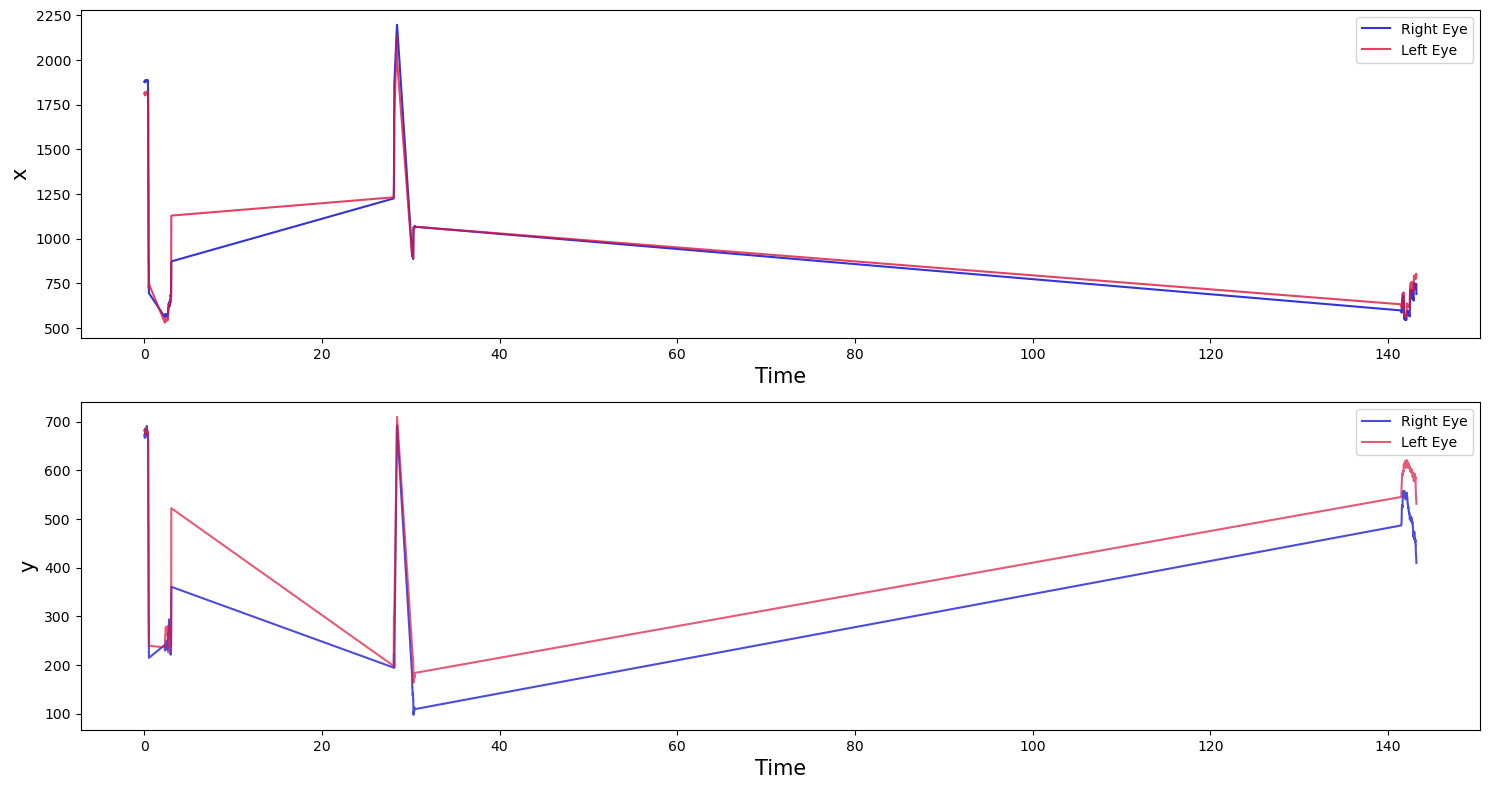

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
last = gaze["Label"][0]
textfiles = [un[0], un[3],un[6] ,un[9] ,un[12], un[15]]
changes = []
skimming_parts = []
index = 0

for i, j in zip(gaze["Label"], gaze["text_file"]):
    if i != "Immersive" and j in textfiles:
        
        changes.append(gaze.loc[index])
        
    elif len(changes) > 0:
        
        skimming_parts.append(changes)
        changes = []
   
    index = index + 1


In [ ]:
for i in range(len(skimming_parts)):
    skimming_parts[i] = pd.DataFrame(skimming_parts[i])
    skimming_parts[i].reset_index(drop=True, inplace=True)
    skimming_parts[i]["device_time_stamp"] = skimming_parts[i]["device_time_stamp"] - skimming_parts[i]["device_time_stamp"][0]
     

In [ ]:
imerserive_parts = [im_HC_AI ,
#im_HC_OR ,
im_SK_AI ,
im_SK_OR ,
im_KB_AI ,
im_KB_OR 
]

In [ ]:
part = 9
left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
t = skimming_parts[part]['device_time_stamp']
eyes = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
eyes

,t,x_right,x_left,y_right,y_left
0,0.000000,1402.691956,1316.601410,981.385603,960.949745
1,0.010965,1437.657471,1427.030487,1027.438574,1082.252798
2,0.022560,1542.875977,1519.831390,1214.512396,1225.470915
3,0.034014,1672.987061,1612.704468,1460.701504,1367.611513
4,0.044360,1684.927368,1772.074432,1491.162643,1589.200516
5,0.055724,1750.983582,1905.951385,1646.569748,1772.979641
6,0.067009,2305.551758,2142.749329,2398.659611,2130.885887
7,0.077798,2302.669525,2440.815430,2447.785149,2645.104580
8,0.088413,2302.669525,2440.815430,2447.785149,2645.104580
9,0.100165,2291.615906,2500.115509,2636.191921,2723.635540


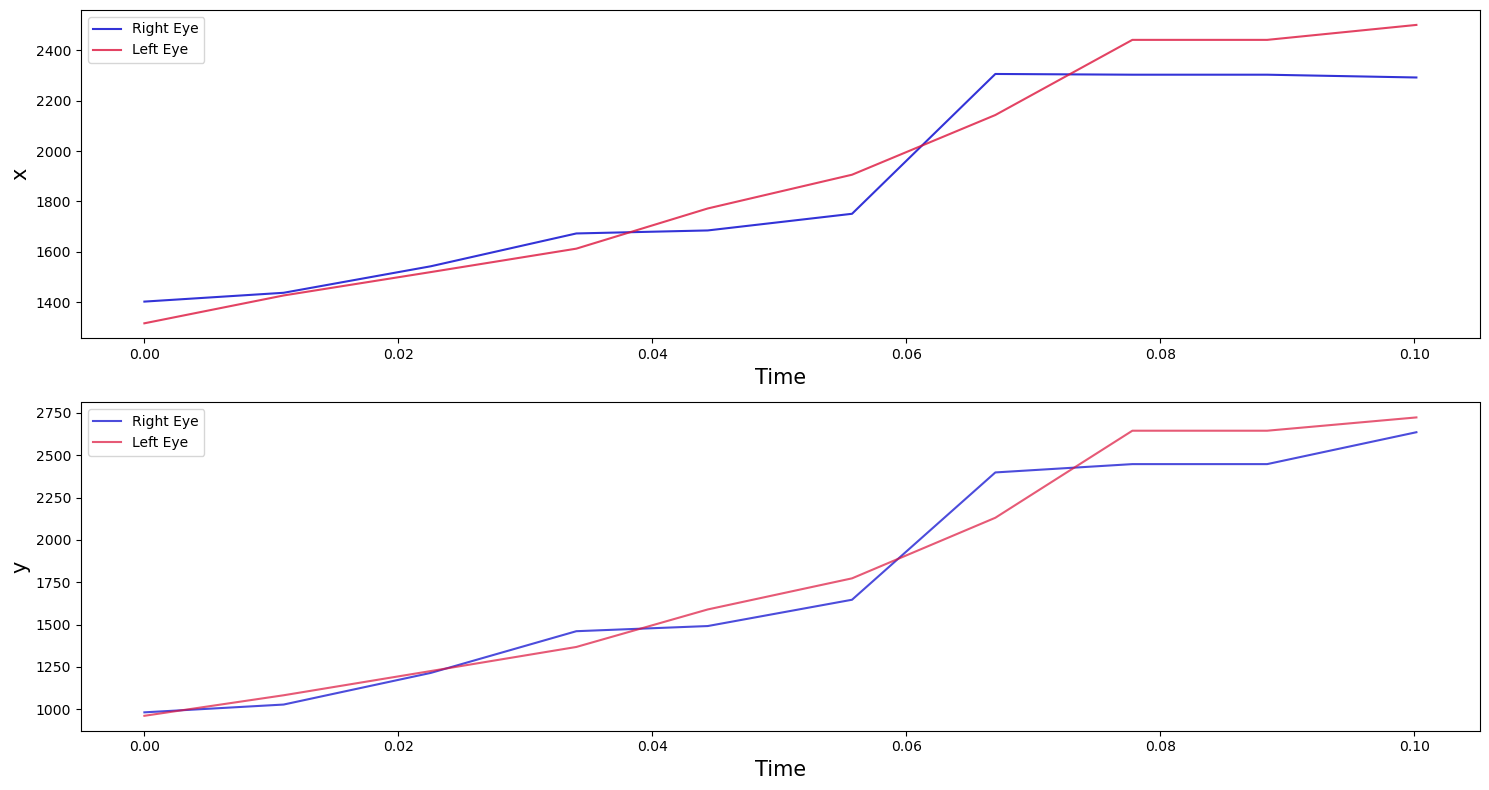

In [ ]:
f, axes = plt.subplots(2, 1, figsize=(15, 8))

axes[0].plot(eyes['t'], eyes['x_right'], c='mediumblue', alpha=0.8, label='Right Eye')
axes[0].plot(eyes['t'], eyes['x_left'], c='crimson', alpha=0.8, label='Left Eye')
axes[0].set_ylabel('x', fontsize=15)


axes[1].plot(eyes['t'], eyes['y_right'], c='mediumblue', alpha=0.7, label='Right Eye')
axes[1].plot(eyes['t'], eyes['y_left'], c='crimson', alpha=0.7, label='Left Eye')
axes[1].set_ylabel('y', fontsize=15)
    
for ax in axes:
    ax.set_xlabel('Time', fontsize=15)
    ax.legend()
plt.tight_layout()
plt.show()


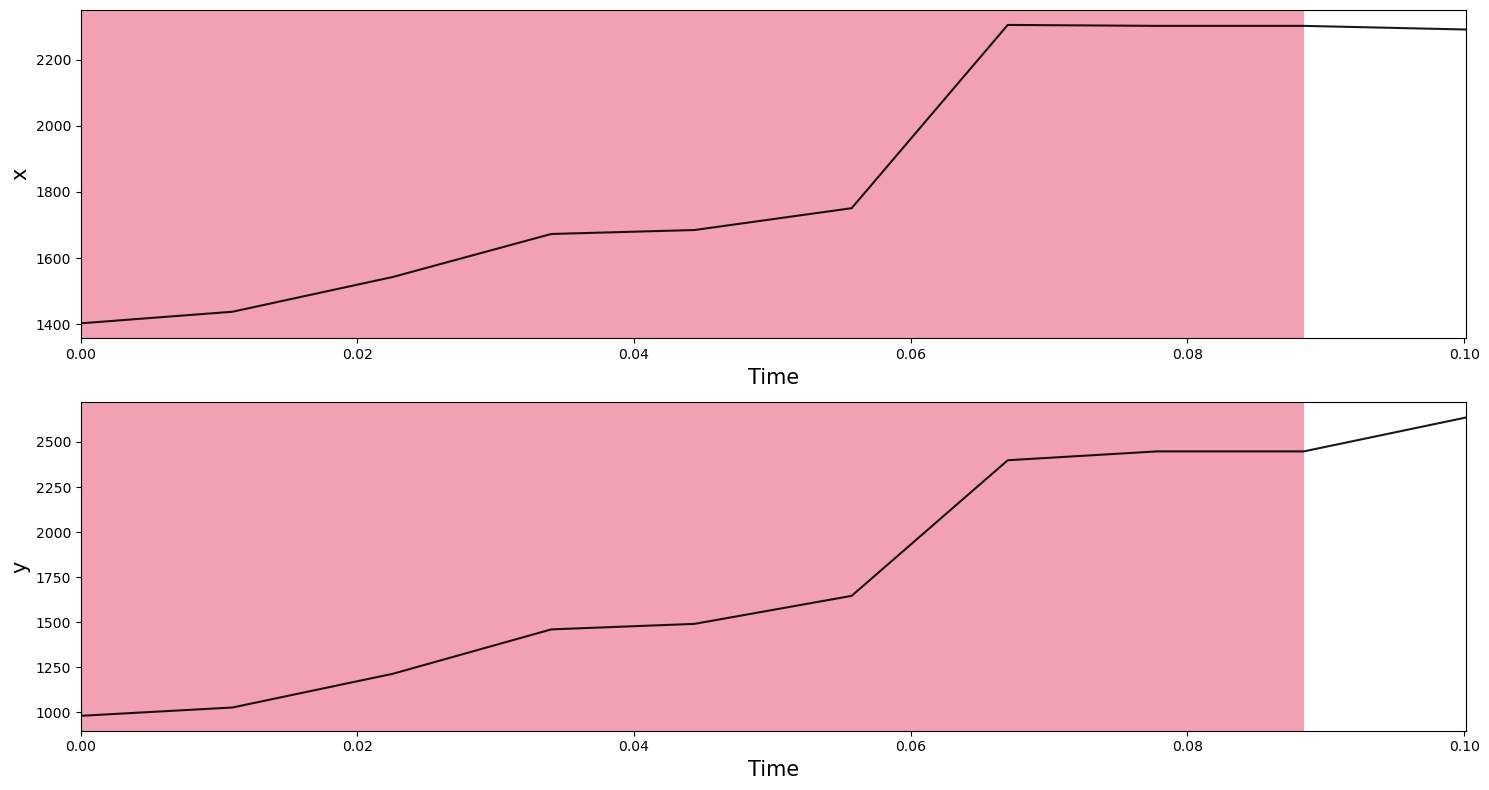

In [ ]:
t = eyes['t']
x = eyes['x_right']
y = eyes['y_right']

classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
classifier.process()
classifier.plot()

In [ ]:
skim_data = []
for i in range(len(skimming_parts)):
    part = i
    left_x = skimming_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = skimming_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = skimming_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = skimming_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = skimming_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = skimming_parts[i].merge(fix, left_index=True, right_index=True)
    skim_data.append(round)


IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.

IHMM parameters re-estimation failed! Returning to original parameters.



In [ ]:
skim_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-12.802769,113.679749,552.733276,50.854744,123.380859,552.467407,0.532204,...,3.344772,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
1,0.011340,1,1,-12.918489,113.600342,552.514099,50.727112,123.403343,552.226501,0.532517,...,3.344452,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
2,0.022465,1,1,-12.970788,113.564598,552.449280,50.647900,123.401230,552.136169,0.532656,...,3.340591,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
3,0.033440,1,1,-13.079043,113.478035,552.347595,50.606213,123.389336,552.104858,0.532943,...,3.344330,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
4,0.045045,1,1,-13.218966,113.369972,552.349121,50.459915,123.355469,552.141357,0.533307,...,3.342239,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,6.107100,1,1,-11.791644,101.589386,543.322266,51.539097,114.475510,543.517761,0.530531,...,3.086456,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
551,6.118170,1,1,-11.770080,101.565620,543.293030,51.550560,114.439140,543.469482,0.530477,...,3.087601,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
552,6.129601,1,1,-11.746619,101.547379,543.342896,51.557735,114.431870,543.486084,0.530414,...,3.097076,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1
553,6.140686,1,1,-11.718885,101.539169,543.331482,51.582401,114.395332,543.469788,0.530342,...,3.095978,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Skimming,1


In [ ]:
im_data = []
for i in range(len(imerserive_parts)):
    part = i
    left_x = imerserive_parts[part]['left_gaze_point_on_display_area_x']*2560
    left_y = imerserive_parts[part]['left_gaze_point_on_display_area_y']*1440
    right_x = imerserive_parts[part]['right_gaze_point_on_display_area_x']*2560
    right_y = imerserive_parts[part]['right_gaze_point_on_display_area_y']*1440
    t = imerserive_parts[part]['device_time_stamp']
    round = pd.DataFrame({'t': t, 'x_right': right_x, 'x_left': left_x, 'y_right': right_y, 'y_left': left_y}).dropna()
    
    t = round['t']
    x = round['x_right']
    y = round['y_right']

    classifier = IHMM(t, x, y, threshold=1000, n_iter = 19)
    classifier.process()
    fix = pd.DataFrame(classifier.fixations, columns=['fixations'])
    round = imerserive_parts[i].merge(fix, left_index=True, right_index=True)
    im_data.append(round)

IHMM parameters re-estimation failed! Returning to original parameters.



In [ ]:
im_data[0]

,device_time_stamp,left_gaze_origin_validity,right_gaze_origin_validity,left_gaze_origin_in_user_x,left_gaze_origin_in_user_y,left_gaze_origin_in_user_z,right_gaze_origin_in_user_x,right_gaze_origin_in_user_y,right_gaze_origin_in_user_z,left_gaze_origin_in_trackbox_x,...,right_pupil_diameter,Reading,text_file,passage_index,font_size,font_name,Author,AI,Label,fixations
0,0.000000,1,1,-23.737494,61.850216,682.347717,38.296875,53.819435,680.529236,0.551225,...,4.035385,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
1,0.011395,1,1,-23.737494,61.850216,682.347717,38.195614,53.718170,681.048462,0.551225,...,4.047485,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
2,0.022705,1,1,-23.785519,61.716354,682.056335,38.123543,53.524681,680.832397,0.551350,...,4.052643,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
3,0.034138,1,1,-23.859596,61.438232,682.006348,38.148426,53.199932,680.772766,0.551517,...,4.061661,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
4,0.044886,1,1,-23.825850,61.322330,681.818176,38.235817,52.919518,680.581604,0.551464,...,4.062256,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728,109.221750,1,1,-59.854431,140.475372,571.782288,8.436225,138.150833,574.313477,0.647205,...,3.048599,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
729,109.232474,1,1,-60.395603,141.593140,571.274963,8.130949,139.321060,573.874329,0.648635,...,3.058624,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
730,109.242443,1,1,-60.395603,141.593140,571.274963,7.982663,139.814331,573.742798,0.648635,...,3.063354,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0
731,109.254891,1,1,-61.014336,142.607178,571.034790,7.825747,140.262512,573.672852,0.650196,...,3.070160,True,AI_HC_P01_text.txt,1.0,16.0,Times New Roman,HC,False,Immersive,0


In [ ]:
colunms_to_drop = ['Reading', 'text_file', 'passage_index', 'AI', 'Label']
for i in range(len(im_data)):
    im_data[i] = im_data[i].drop(columns = colunms_to_drop)
for i in range(len(skim_data)):
    skim_data[i] = skim_data[i].drop(columns = colunms_to_drop)

In [ ]:
y_label = []
x_data = []
for i in range(len(im_data)):
    y_label.append("immersive")
    x_data.append(im_data[i])
for i in range(len(skim_data)):
    y_label.append("skimming")
    x_data.append(skim_data[i])

In [ ]:
com_DF = pd.concat(x_data, ignore_index=True)

com_DF.to_csv(f'x_data_{testperson}.csv', index = False)
np.savetxt(f'y_label_{testperson}.csv', y_label, fmt='%s', delimiter=",")